<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        ML- SUPERVISED LEARNING - CLASSIFICATION
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> Support Vector Machines (SVM- Classification)</font></h2> 

---
    
<p align="right">
  Duygu Jones | Data Scientist  | July 2024 
    <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>


# <font color='green'> <b>EDA</b><font color='black'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [6]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

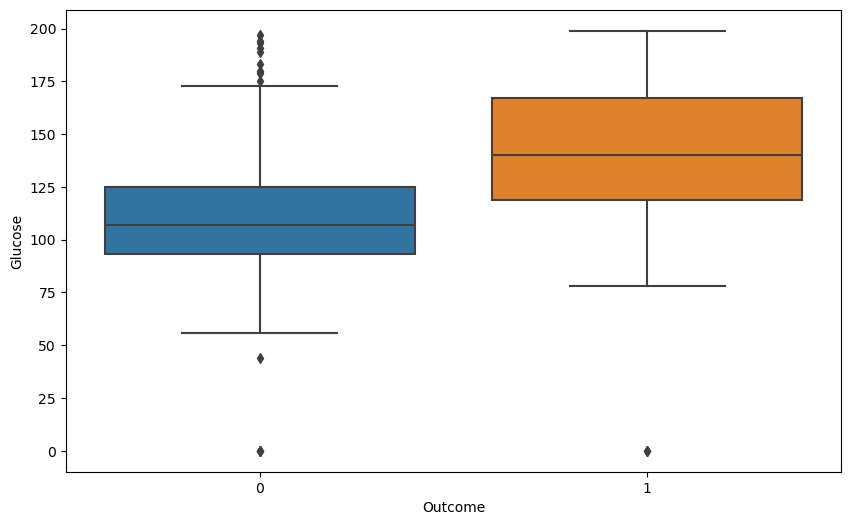

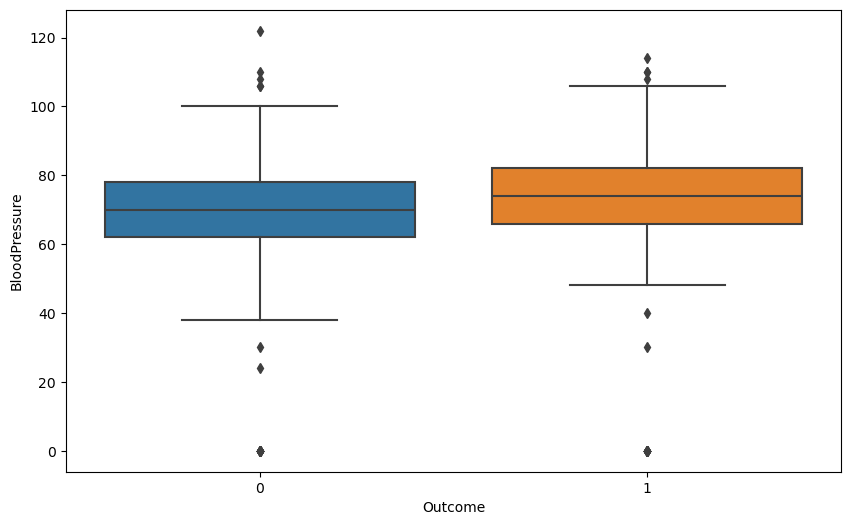

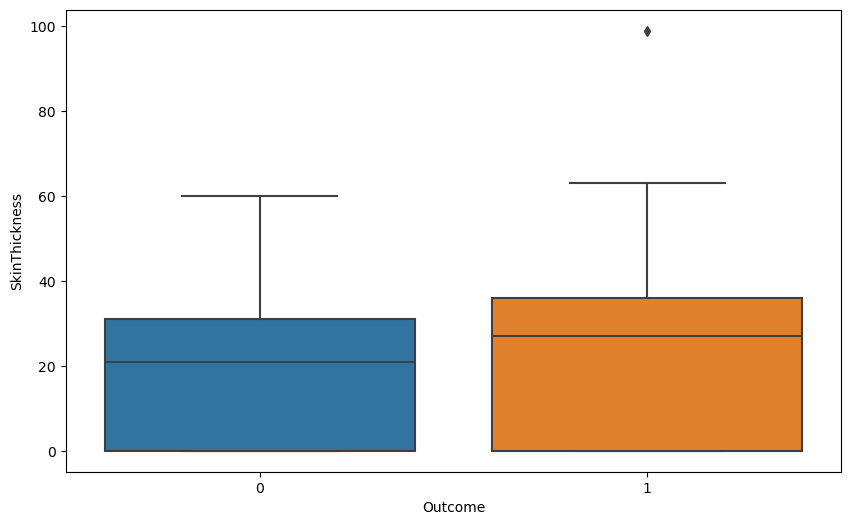

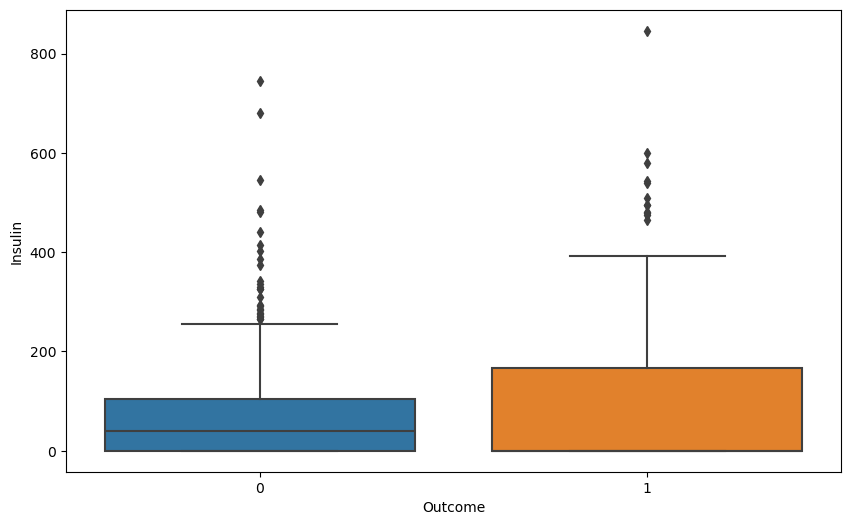

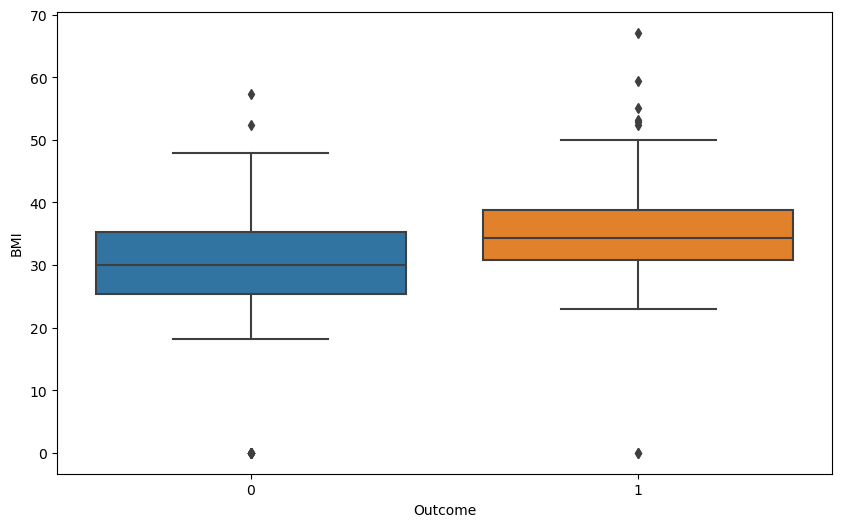

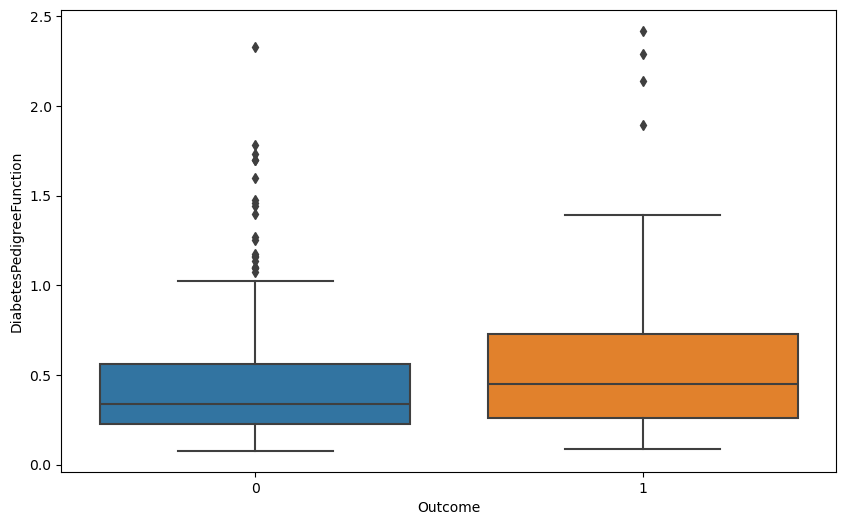

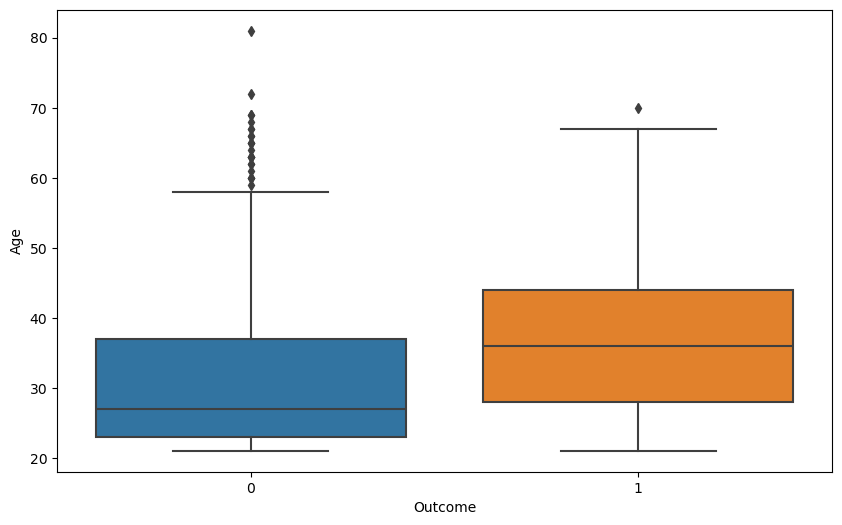

In [7]:
features = df.drop("Outcome", axis=1).columns

for i, feature in enumerate(features, 1):
    sns.boxplot(x="Outcome", y=feature, data=df)
    plt.show()

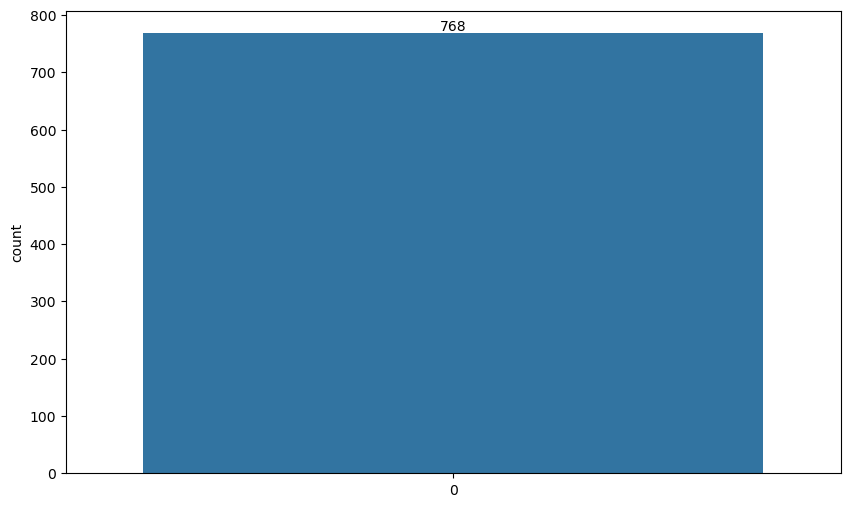

In [8]:
ax = sns.countplot(df.Outcome)
ax.bar_label(ax.containers[0]);

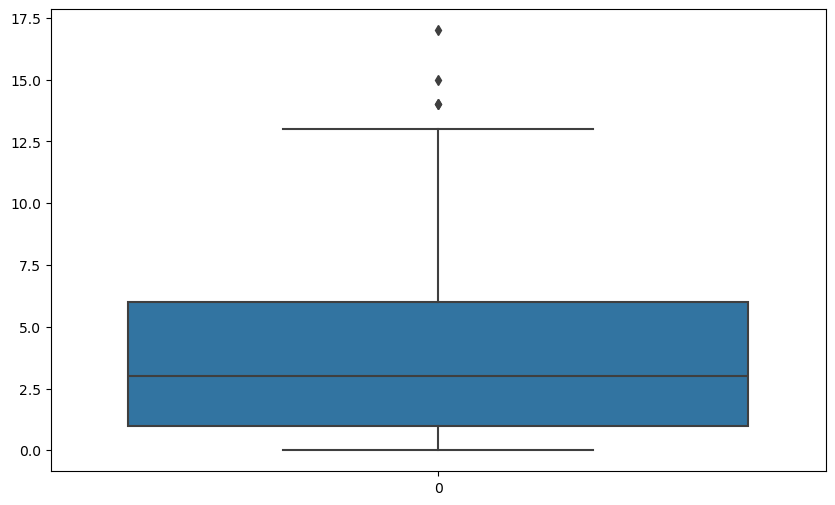

In [9]:
sns.boxplot(df.Pregnancies);

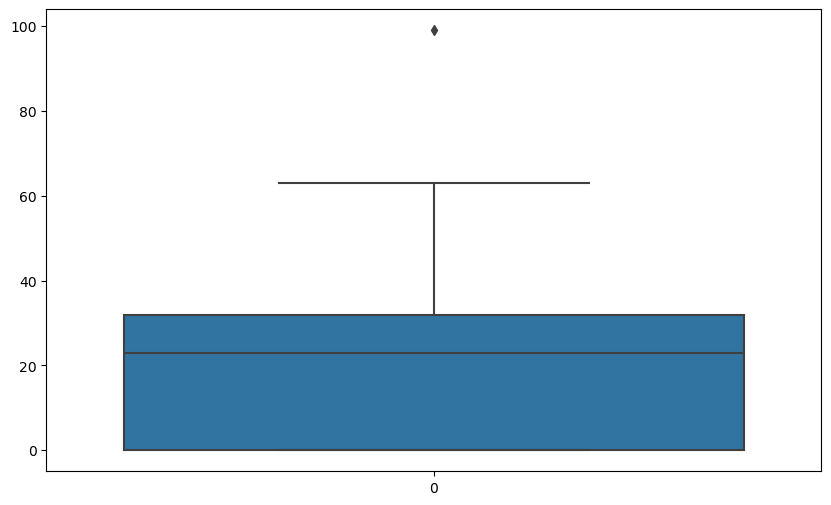

In [10]:
sns.boxplot(df.SkinThickness);

In [11]:
df=df[df.SkinThickness<70]

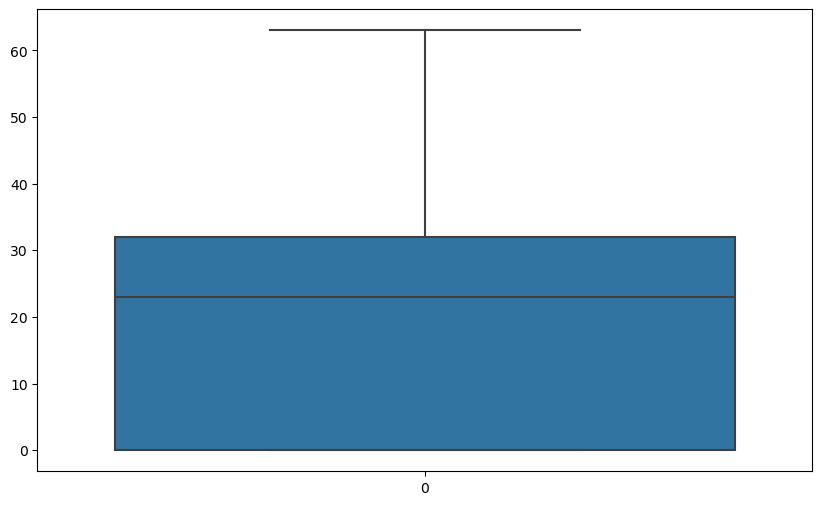

In [12]:
sns.boxplot(df.SkinThickness);

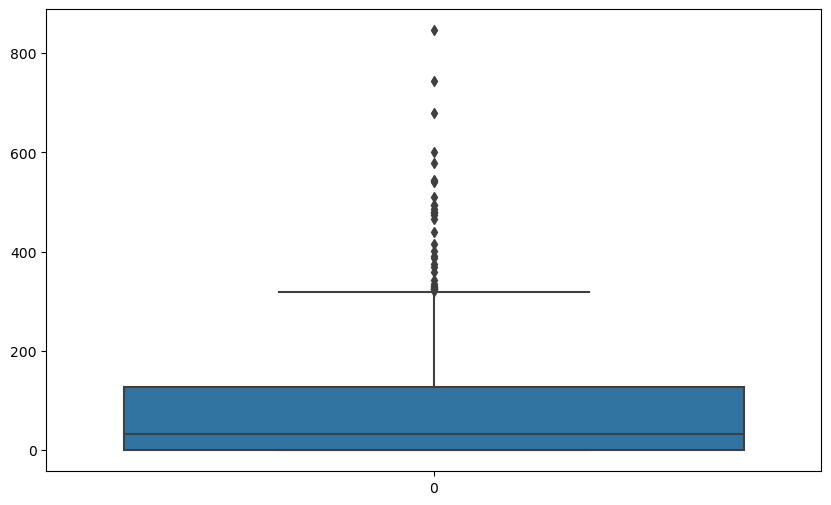

In [13]:
sns.boxplot(df.Insulin);

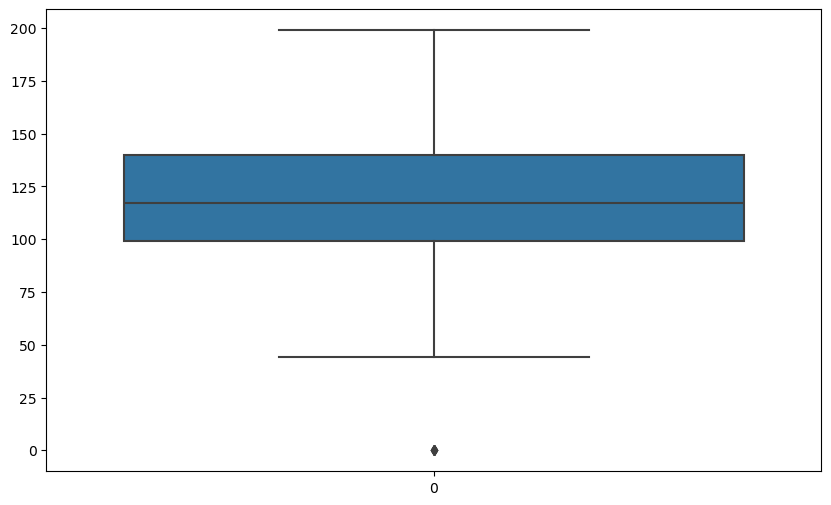

In [14]:
sns.boxplot(df.Glucose);

In [15]:
df=df[df.Glucose>0]

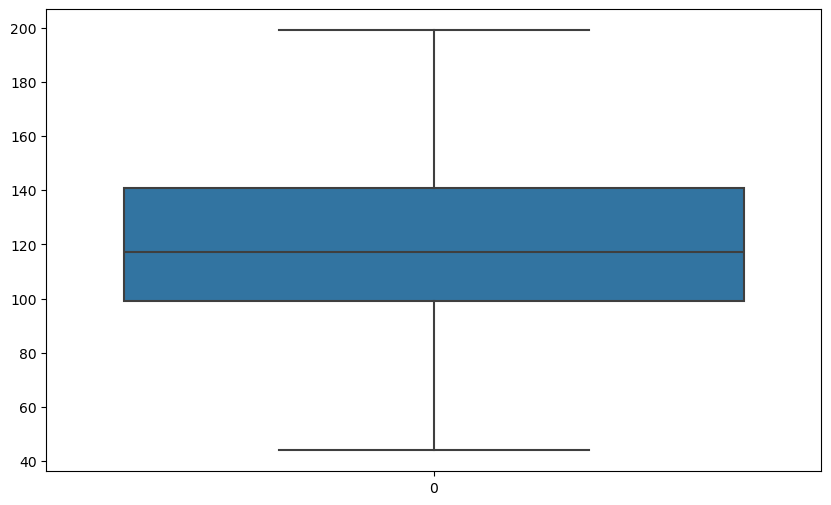

In [16]:
sns.boxplot(df.Glucose);

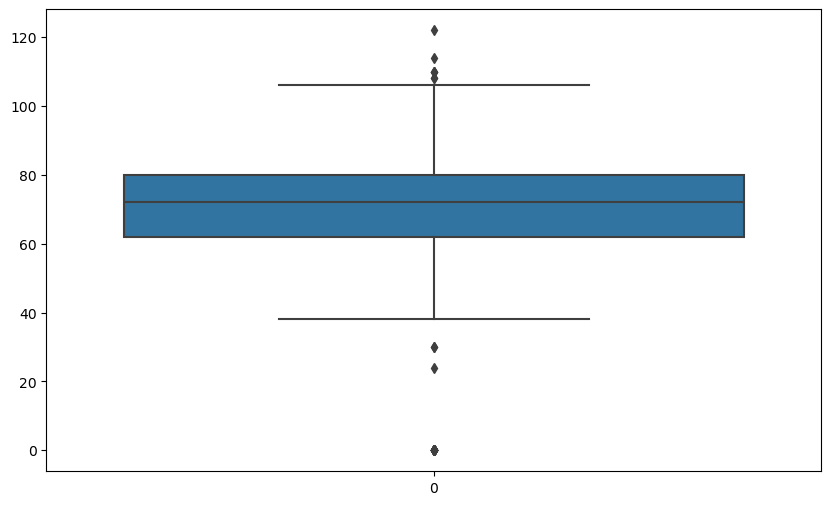

In [17]:
sns.boxplot(df.BloodPressure);

In [18]:
df=df[df.BloodPressure>35]

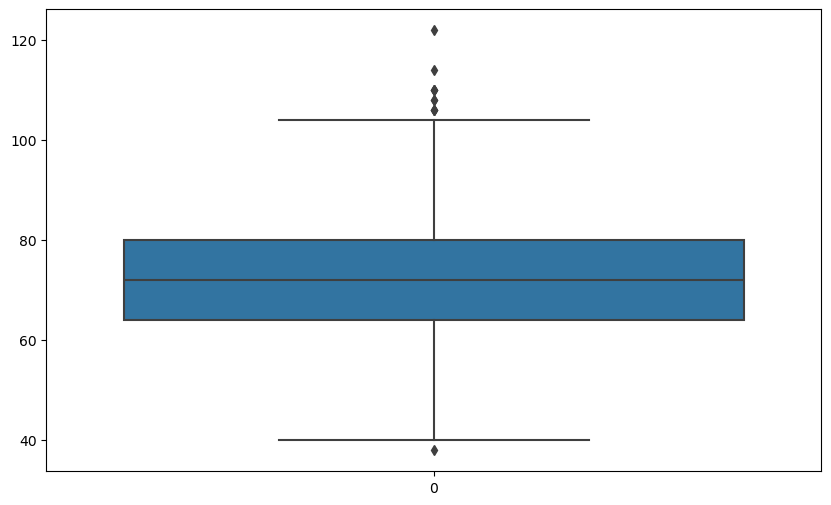

In [19]:
sns.boxplot(df.BloodPressure);

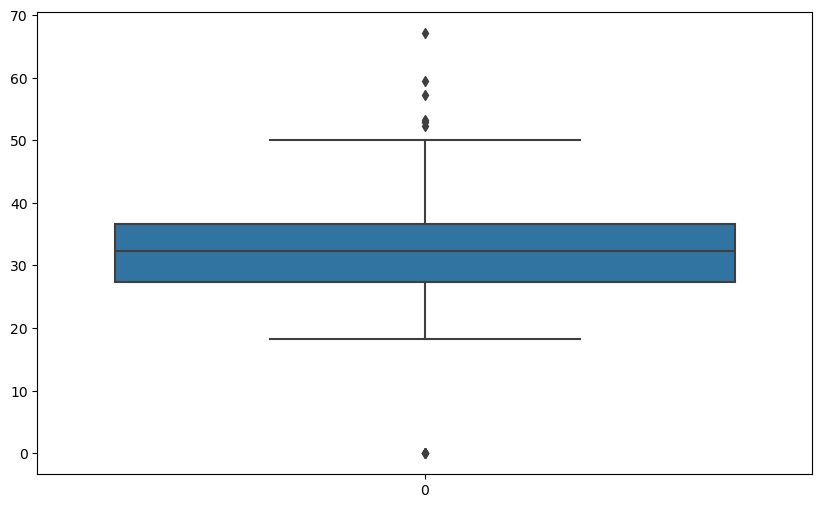

In [20]:
sns.boxplot(df.BMI);

In [21]:
df=df[df.BMI>0]

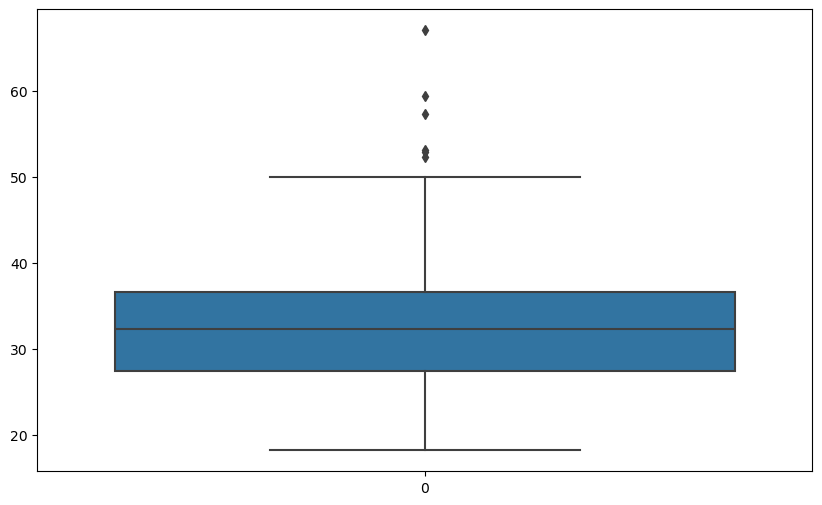

In [22]:
sns.boxplot(df.BMI);

In [23]:
df.shape

(720, 9)

In [24]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

In [25]:
df.Outcome.value_counts(normalize=True)

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64

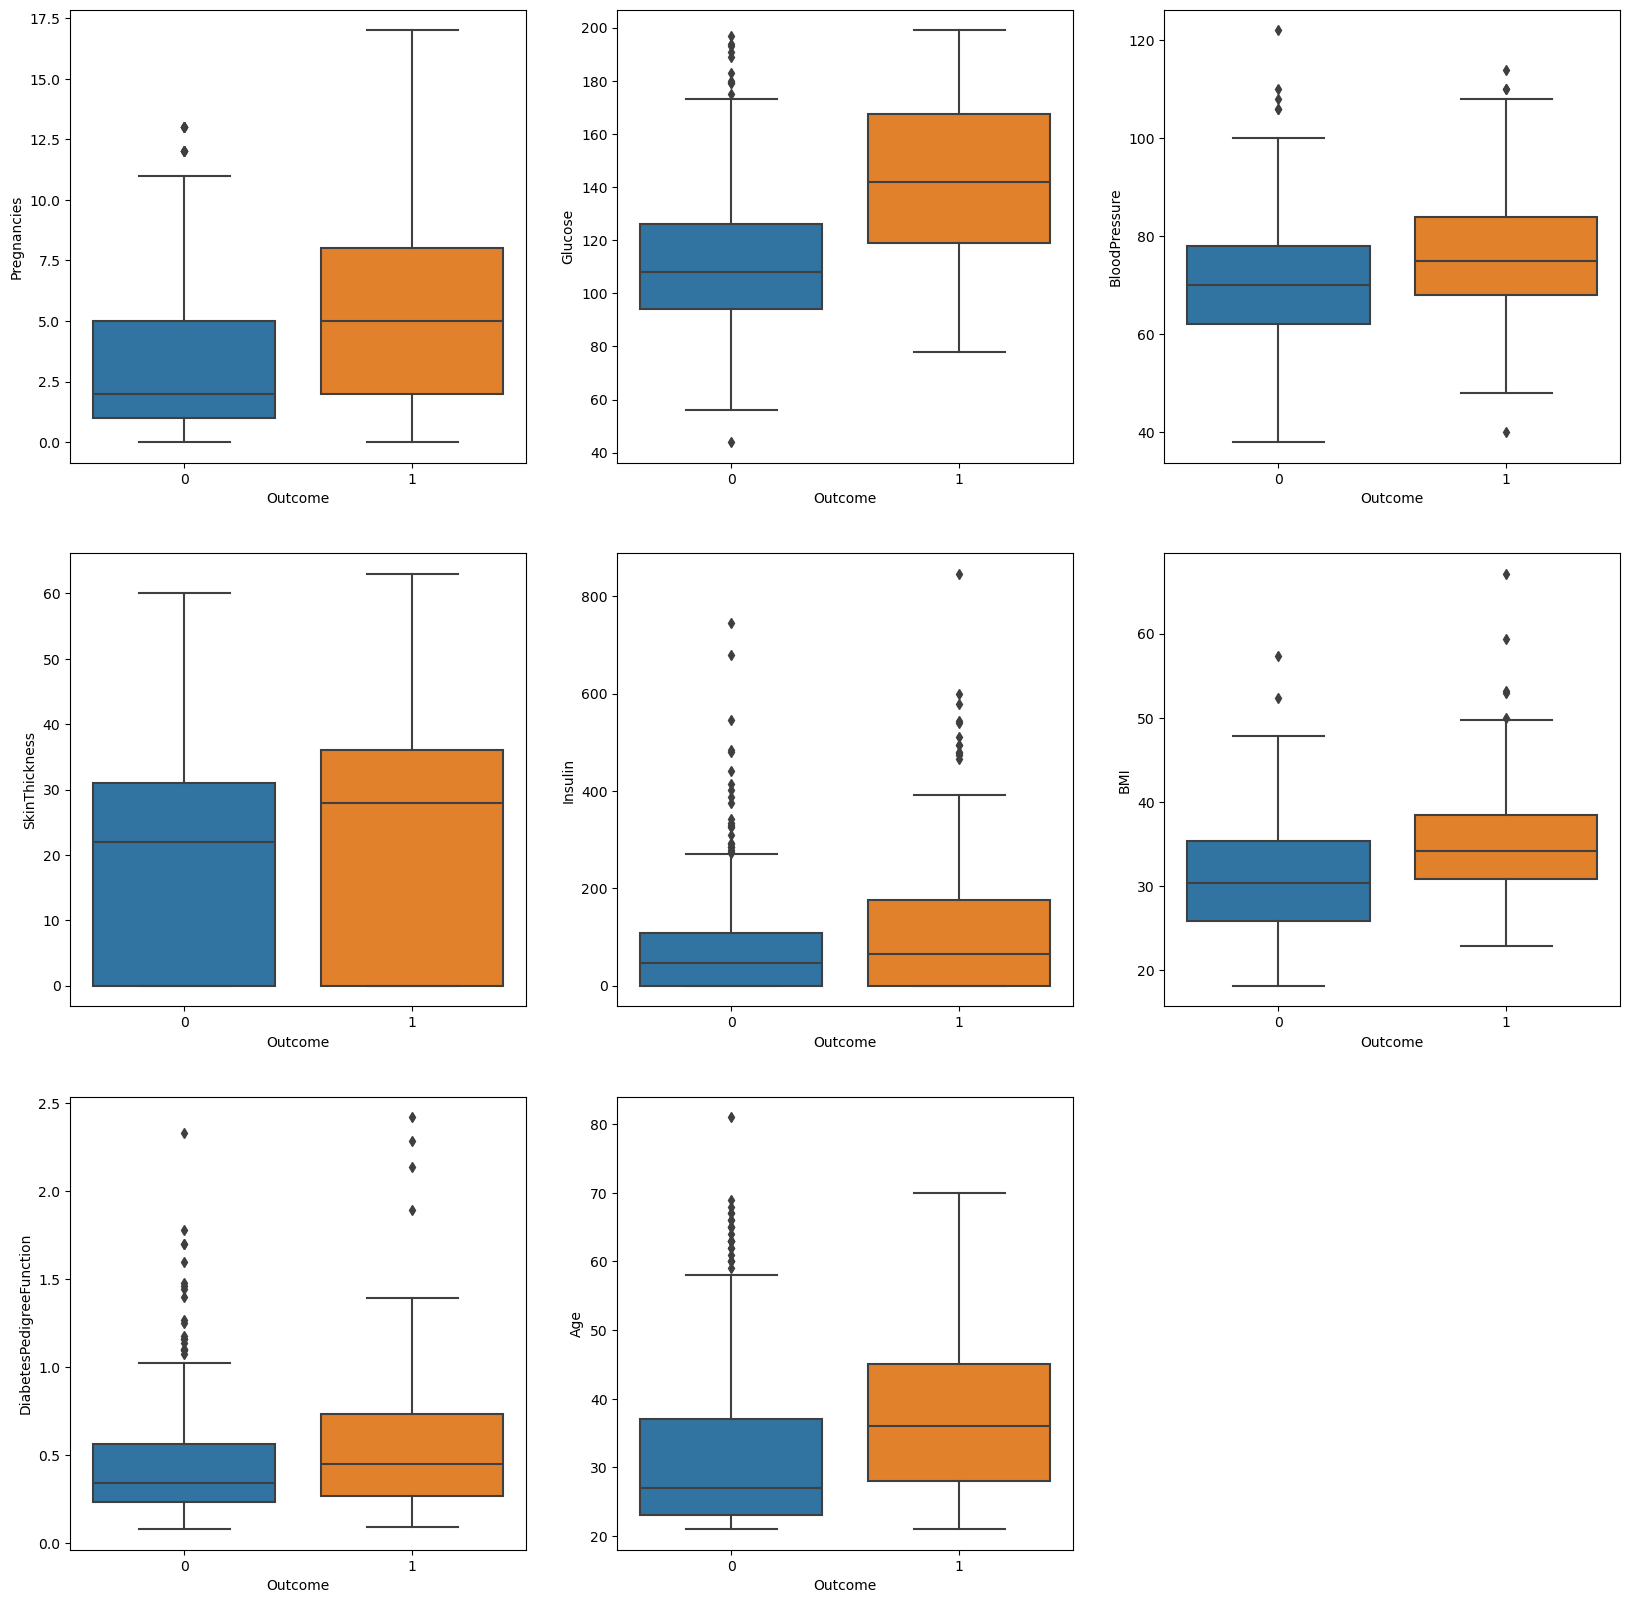

In [26]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

In [27]:
import plotly.express as px
plt.figure(figsize=(10,8))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot=True);

<Figure size 1000x800 with 0 Axes>

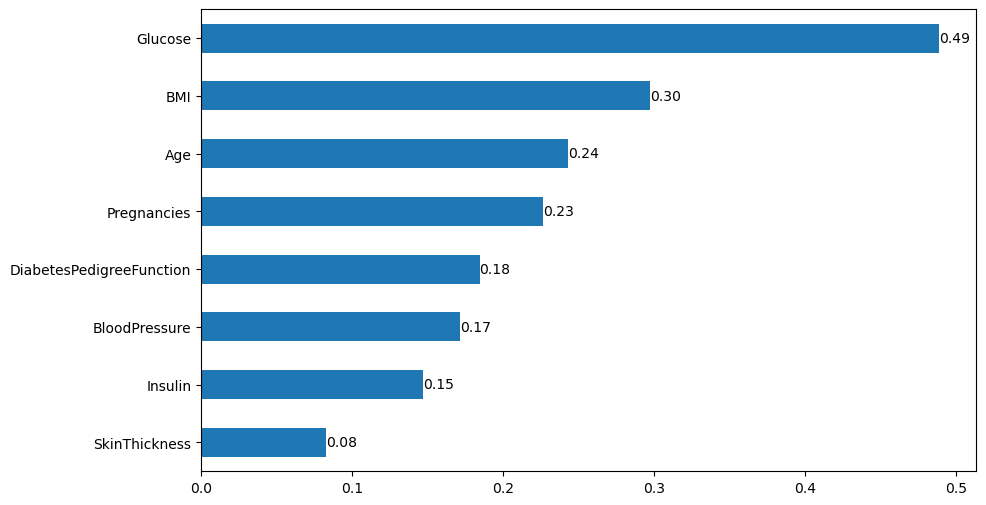

In [28]:
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt="%.2f");

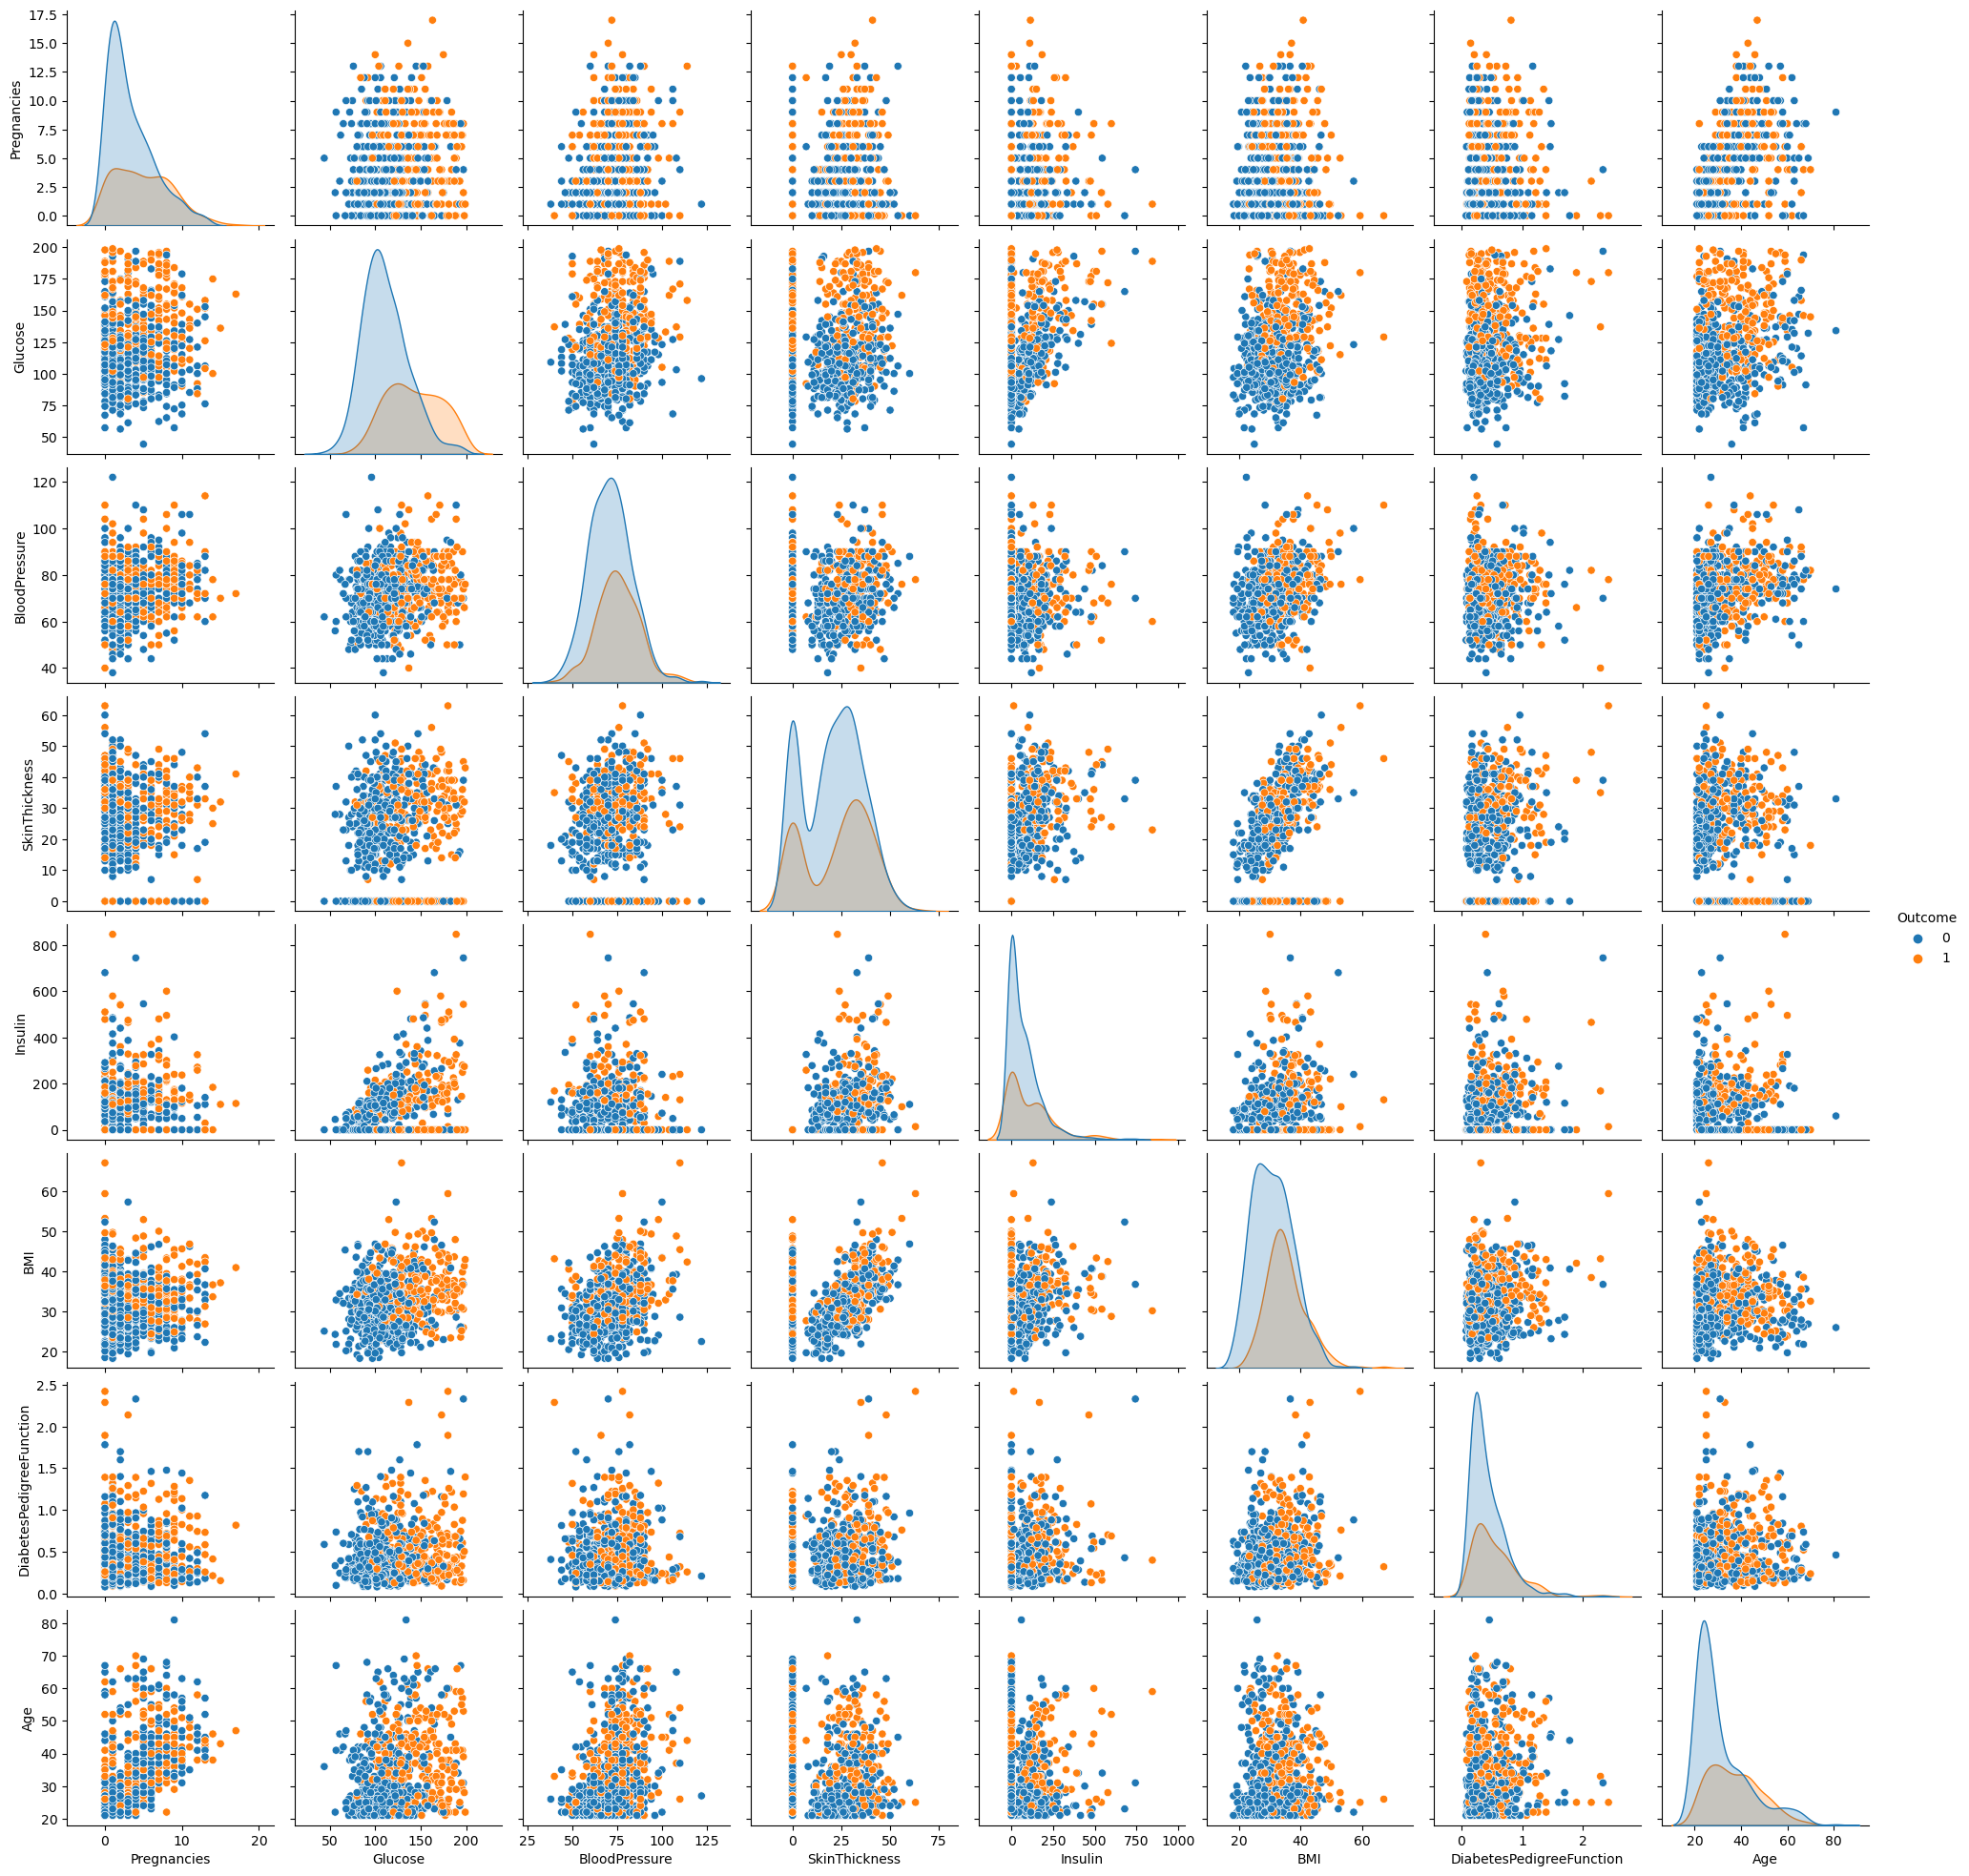

In [29]:
sns.pairplot(df, hue = "Outcome");

# <font color='green'> <b>Modelling and Model Performance</b><font color='black'>

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [30]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## <font color='blue'> <b>Without Scaling</b><font color='black'>

In [33]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

# SVM distance tabanlı bir model olduğundan datanın scale edilmesi gerekiyor. 
# Ama sonuçların nasıl değiştiği görmek maksadıyla önce scale etmeden devam edeceğiz.

Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576



In [34]:
model = SVC()

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.737871
train_accuracy     0.756558
test_precision     0.708153
train_precision    0.736046
test_recall        0.420000
train_recall       0.455097
test_f1            0.520214
train_f1           0.562177
dtype: float64

## <font color='blue'> <b>With Scaling</b><font color='black'>

In [35]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

# Şimdi scale yaparak scorları gözlemleyelim.

In [36]:
pipe_model.fit(X_train, y_train)

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



In [37]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

# Overfiting kontrolünü burda sağlıyoruz.

test_accuracy      0.751785
train_accuracy     0.830634
test_precision     0.672696
train_precision    0.824515
test_recall        0.535789
train_recall       0.644231
test_f1            0.593820
train_f1           0.723120
dtype: float64

## <font color='blue'> <b>With Best Parameters (GridsearchCV)</b><font color='black'>

In [38]:
pipe_model.get_params() # Param grid içine nasıl vereceğimizin cevabı

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [39]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1, 0.5],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.5],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

# Hyper-parameter uzayımızı belirliyoruz.

In [40]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]

pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X_train, y_train)

# SVC predict_proba üzerinden prediction yapmaz.
# Tahminleri decision_function üzerinden yapar. 
# Eğer predict_proba almak istiyorsak SVC'nin probabilty hyper_parametresini True olarak düzenlememiz gerekiyor.

In [41]:
svm_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 0.5,
 'SVC__kernel': 'rbf'}

In [42]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.1, class_weight='balanced', gamma=0.5,
                     probability=True))])

In [43]:
svm_model_grid.best_index_

68

In [44]:
pd.DataFrame(svm_model_grid.cv_results_).loc[68, ["mean_test_score", "mean_train_score"]]

# overfiting kontrolümüzü yapıyoruz.

mean_test_score     0.919487
mean_train_score    0.953276
Name: 68, dtype: object

In [45]:
svm_model_grid.best_score_

0.9194871794871796

In [46]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[39 56]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.95      0.41      0.57        95
           1       0.46      0.96      0.62        49

    accuracy                           0.60       144
   macro avg       0.70      0.68      0.60       144
weighted avg       0.78      0.60      0.59       144


Train_Set
[[174 204]
 [ 10 188]]
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       378
           1       0.48      0.95      0.64       198

    accuracy                           0.63       576
   macro avg       0.71      0.70      0.63       576
weighted avg       0.79      0.63      0.63       576



In [47]:
decision_function = svm_model_grid.decision_function(X_test)
decision_function

# SVC prediction işlemini decision_function fonksiyonu üzerinden yapar. 
# Pozitif değerler 1 classını gösterirken, negatif değerler 0 classını gösterir. 
# Mutlak değer ne kadar büyükse gözlemin hyper plane'den o kadar uzakta olduğunu gösterir.

array([ 0.63906031,  0.79176295,  0.73519068, -0.20225419,  0.73316814,
       -0.57631943,  0.14825358,  0.85812815, -1.04880001,  0.1844397 ,
        0.26680333,  0.47775977,  0.11396222, -0.4017274 ,  0.89937631,
        0.6278782 , -1.08504776,  0.95010194,  0.70130479, -1.20395382,
        0.74770131, -0.07649685,  0.98603743,  0.26873278, -0.11500394,
        0.59273926, -0.52231513,  0.47599842, -0.05154567, -0.24826285,
        0.62556277,  0.50165338,  0.61702153,  0.16478031,  0.63058378,
       -0.09905568,  0.7150412 ,  0.49701597,  0.65528673,  0.41153283,
        0.49320867, -0.98788463, -0.77986735,  0.85614723,  0.63227463,
        0.22172904,  0.59437648,  0.65216303,  0.96705383,  0.48881574,
        0.62548838, -0.76023745,  0.13982543, -0.44174264, -0.71059951,
        0.94776704,  0.63522658, -1.36076657,  0.72029338,  0.94844814,
        0.73322563,  0.65687659,  0.87010536,  0.96131497,  1.01536471,
       -0.9035248 ,  0.66032752,  0.13228042,  0.67700769, -0.61

In [48]:
predict_proba = svm_model_grid.predict_proba(X_test)[:,1]
predict_proba

# Predict_probaya göre 0.5'in üzerinde olanların 1 classına, 0.5'in altında olanların 0 classına atanması gerekiyor. 
# Ancak,26. ve 28. gözlemler sırasıyla 0.47124411 ve 0.39960741 olmasına rağmen 1 classına atanmış. 
# Bu yüzden SVC'de predict_proba düzgün çalışmadığından predict_probayı kullanmıyoruz.

array([0.4898663 , 0.5759331 , 0.54415108, 0.12522664, 0.54301261,
       0.06041479, 0.24032669, 0.6132368 , 0.02104484, 0.25558837,
       0.29261953, 0.40058906, 0.22645   , 0.0835465 , 0.63660234,
       0.48354703, 0.01939406, 0.65996249, 0.52505097, 0.01483082,
       0.55118903, 0.15985073, 0.67796247, 0.29352386, 0.14849507,
       0.46374339, 0.06489347, 0.39965328, 0.16757777, 0.11426221,
       0.48223922, 0.41339762, 0.47741764, 0.24721875, 0.48507555,
       0.15311523, 0.53280026, 0.41089561, 0.5       , 0.36629532,
       0.40884708, 0.02413854, 0.03848601, 0.61211952, 0.48603096,
       0.27196681, 0.46466339, 0.5       , 0.66851522, 0.40648991,
       0.48219721, 0.04020911, 0.23686291, 0.07687142, 0.0449074 ,
       0.65877609, 0.48769923, 0.0104071 , 0.53576087, 0.65912238,
       0.54304497, 0.5       , 0.62000048, 0.66563188, 0.69227381,
       0.02917792, 0.5       , 0.23379141, 0.51132506, 0.05581928,
       0.4649025 , 0.39294637, 0.54057809, 0.37384311, 0.55728

In [49]:
svm_model_grid.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

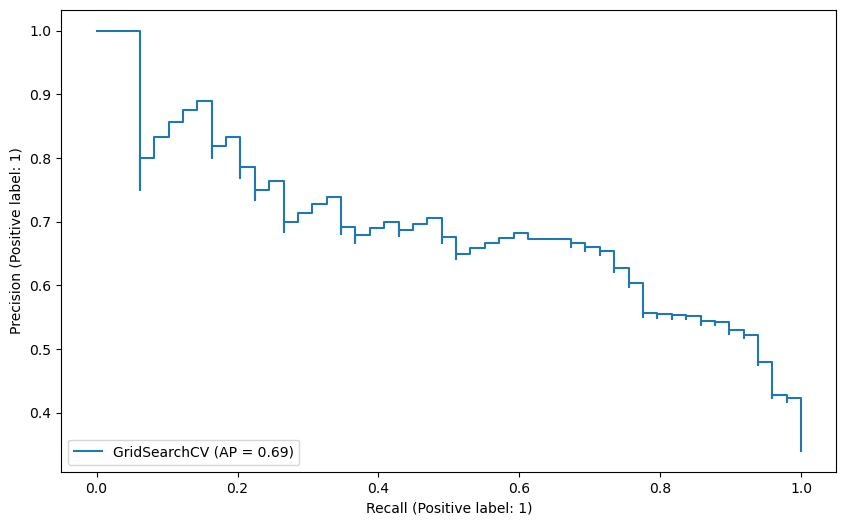

In [50]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);

# SVC model desion_function üzerinden average precision veya AUC değerlerini alabiliyoruz.

In [51]:
average_precision_score(y_test, decision_function)

# average_precision scoru olarak decision functionu tercih ediyoruz.
# Çünkü predict probanın düzgün çalışmadığını biliyoruz.

0.6916071833158592

## <font color='blue'> <b>Comparing SVM and Logistic Regression Scores</b><font color='black'>

<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---

<p align="right">
  Duygu Jones | Data Scientist  | 2024
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>